<a href="https://colab.research.google.com/github/Phoebe125/Var_and_ES/blob/main/VaR_and_ES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance #설치

     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 6.4 MB 41.9 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import yfinance as yf

Historical simulation (non-parametric VaR)

In [ ]:
aapl = yf.download('AAPL', '2020-01-01')['Adj Close'] #애플의 종가 불러오기
aapl

[*********************100%***********************]  1 of 1 completed


Date
2020-01-02     73.894333
2020-01-03     73.175926
2020-01-06     73.758995
2020-01-07     73.412109
2020-01-08     74.593056
                 ...    
2022-03-24    174.070007
2022-03-25    174.720001
2022-03-28    175.600006
2022-03-29    178.960007
2022-03-30    177.770004
Name: Adj Close, Length: 566, dtype: float64

In [ ]:
aapl = aapl[-501:] #총 501개의 최신 데이터
aapl = aapl.pct_change() #퍼센트 변화로 나타냄
aapl.dropna(inplace = True)
aapl

Date
2020-04-07   -0.011583
2020-04-08    0.025595
2020-04-09    0.007216
2020-04-13    0.019628
2020-04-14    0.050503
                ...   
2022-03-24    0.022678
2022-03-25    0.003734
2022-03-28    0.005037
2022-03-29    0.019134
2022-03-30   -0.006650
Name: Adj Close, Length: 500, dtype: float64

In [ ]:
desc = aapl.describe()
desc.loc['var'] = aapl.var()
desc.loc['skew'] = aapl.skew()
desc.loc['kurt'] = aapl.kurtosis()
desc

count    500.000000
mean       0.002207
std        0.019253
min       -0.080061
25%       -0.008422
50%        0.001480
75%        0.013725
max        0.104689
var        0.000371
skew       0.131979
kurt       2.403142
Name: Adj Close, dtype: float64

In [ ]:
aapl.std() * np.sqrt(252) #연간 변동성

0.30562705669977386

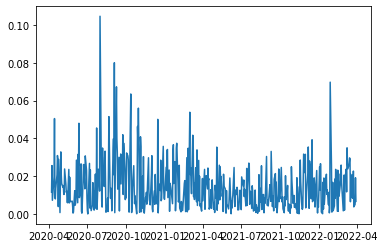

In [ ]:
plt.plot(abs(aapl)); #시각화

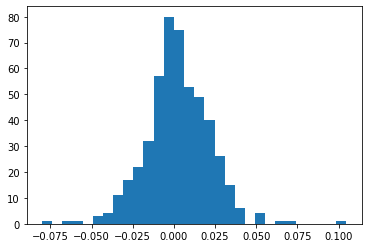

In [ ]:
plt.hist(aapl, bins=30);#히스토그램으로 시각화

In [ ]:
rtns = aapl.sort_values() #안좋은 순서대로 나타내기
rtns

Date
2020-09-03   -0.080061
2020-09-08   -0.067295
2020-10-30   -0.056018
2020-06-11   -0.048010
2020-10-28   -0.046312
                ...   
2020-08-21    0.051532
2021-03-01    0.053851
2020-10-12    0.063521
2022-01-28    0.069778
2020-07-31    0.104689
Name: Adj Close, Length: 500, dtype: float64

In [ ]:
#99% 신뢰수준에서 1일 VaR(%)
historical_VaR = rtns[4]
round(historical_VaR,4)

-0.0463

In [ ]:
#Expected Shortfall
historical_ES = rtns[:5].mean()
round(historical_ES,4)

-0.0595

Historical Simulation VaR for a portfolio of stocks

In [ ]:
aapl = yf.download('AAPL', '2020-01-01')['Adj Close'] #애플의 종가 불러오기
nke = yf.download('NKE', '2020-01-01')['Adj Close'] #애플의 종가 불러오기
jnj = yf.download('JNJ', '2020-01-01')['Adj Close'] #애플의 종가 불러오기
dis = yf.download('DIS', '2020-01-01')['Adj Close'] #애플의 종가 불러오기
xom = yf.download('XOM', '2020-01-01')['Adj Close'] #애플의 종가 불러오기

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
stocks = pd.DataFrame()
stocks['AAPL'] = aapl
stocks['NKE'] = nke
stocks['JNJ'] = jnj
stocks['DIS'] =dis
stocks['XOM'] = xom
stocks

,AAPL,NKE,JNJ,DIS,XOM
Date,,,,,
2020-01-02,73.894325,100.250923,137.729294,148.199997,61.174900
2020-01-03,73.175926,99.976273,136.134674,146.500000,60.683086
2020-01-06,73.759003,99.887985,135.964874,145.649994,61.149006
2020-01-07,73.412109,99.838936,136.795166,145.699997,60.648575
2020-01-08,74.593048,99.613327,136.776321,145.399994,59.733971
...,...,...,...,...,...
2022-03-24,174.070007,132.080002,175.240005,138.960007,83.379997
2022-03-25,174.720001,133.699997,176.919998,139.139999,85.199997
2022-03-28,175.600006,134.809998,177.830002,138.720001,82.809998


In [ ]:
stocks = stocks.iloc[-501:] #최근 500개의 데이터 사용
stocks = stocks.pct_change() #퍼센트 변화로 값을 바꿈
stocks.dropna(inplace = True)
stocks

,AAPL,NKE,JNJ,DIS,XOM
Date,,,,,
2020-04-07,-0.011582,-0.005554,-0.016314,0.016670,0.019026
2020-04-08,0.025595,0.013546,0.042042,-0.001679,0.063288
2020-04-09,0.007216,0.017468,-0.014170,0.033937,-0.016420
2020-04-13,0.019627,-0.026846,-0.010338,-0.009569,-0.008579
2020-04-14,0.050503,0.035638,0.044788,0.024444,-0.007717
...,...,...,...,...,...
2022-03-24,0.022678,-0.006917,0.005162,0.009590,0.003007
2022-03-25,0.003734,0.012265,0.009587,0.001295,0.021828
2022-03-28,0.005037,0.008302,0.005144,-0.003019,-0.028052


In [ ]:
stock_returns = (stocks+1).cumprod()
stock_returns

,AAPL,NKE,JNJ,DIS,XOM
Date,,,,,
2020-04-07,0.988418,0.994446,0.983686,1.016670,1.019026
2020-04-08,1.013716,1.007917,1.025043,1.014963,1.083519
2020-04-09,1.021031,1.025523,1.010518,1.049407,1.065728
2020-04-13,1.041071,0.997991,1.000072,1.039365,1.056585
2020-04-14,1.093649,1.033558,1.044863,1.064772,1.048431
...,...,...,...,...,...
2022-03-24,2.689251,1.586617,1.320466,1.395461,2.354025
2022-03-25,2.699293,1.606077,1.333125,1.397268,2.405408
2022-03-28,2.712889,1.619411,1.339982,1.393051,2.337932


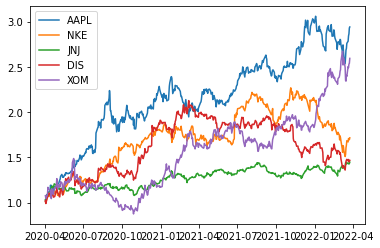

In [ ]:
#각 수식의 returns
plt.plot(stock_returns)
plt.legend(stock_returns.columns);

문제 1: 애플, 나이키, 존슨앤존슨, 디즈니, 의슨모빌로 이루어진 주식 포트폴리오의 비중이 각각 10%, 20%, 20%, 25%, 25% 일때, Historical Simulation을 이용하여 포트폴리오의 99% 신뢰도 기준 1일 VaR을 구하시오

In [ ]:
weights = [0.1, 0.2, 0.2, 0.25, 0.25]
portfolio = stocks @ weights

In [ ]:
portfolio

Date
2020-04-02    0.035222
2020-04-03   -0.018430
2020-04-06    0.054903
2020-04-07    0.003392
2020-04-08    0.029079
                ...   
2022-03-21    0.008610
2022-03-22    0.007183
2022-03-23   -0.000533
2022-03-24    0.005066
2022-03-25    0.010525
Length: 500, dtype: float64

In [ ]:
portfolio = portfolio[-501:] #총 501개의 최신 데이터
portfolio.dropna(inplace = True)
portfolio

Date
2020-04-02    0.035222
2020-04-03   -0.018430
2020-04-06    0.054903
2020-04-07    0.003392
2020-04-08    0.029079
                ...   
2022-03-21    0.008610
2022-03-22    0.007183
2022-03-23   -0.000533
2022-03-24    0.005066
2022-03-25    0.010525
Length: 500, dtype: float64

In [ ]:
desc = portfolio.describe()
desc.loc['var'] = portfolio.var()
desc.loc['skew'] = portfolio.skew()
desc.loc['kurt'] = portfolio.kurtosis()
desc

count    500.000000
mean       0.001436
std        0.012821
min       -0.069374
25%       -0.006207
50%        0.001175
75%        0.008474
max        0.064792
var        0.000164
skew       0.175134
kurt       3.710081
dtype: float64

In [ ]:
rtns = portfolio.sort_values() #안좋은 순서대로 나타내기
rtns

Date
2020-06-11   -0.069374
2020-10-28   -0.039893
2020-06-26   -0.034635
2020-05-01   -0.031745
2020-06-24   -0.031101
                ...   
2020-04-02    0.035222
2020-04-17    0.047436
2020-05-18    0.049536
2020-04-06    0.054903
2020-11-09    0.064792
Length: 500, dtype: float64

In [ ]:
#99% 신뢰수준에서 1일 VaR(%)
historical_VaR = rtns[4]
round(historical_VaR,4)

-0.0311

In [ ]:
#Expected Shortfall
historical_ES = rtns[:5].mean()
round(historical_ES,4)

-0.0413

Model building approach (parametric bar)

In [ ]:
aapl = yf.download('AAPL', '2020-01-01')['Adj Close'] #애플의 종가 불러오기
aapl = aapl[-501:]
aapl = aapl.pct_change()
aapl.dropna(inplace = True)
aapl

[*********************100%***********************]  1 of 1 completed


Date
2020-04-02    0.016687
2020-04-03   -0.014371
2020-04-06    0.087237
2020-04-07   -0.011582
2020-04-08    0.025595
                ...   
2022-03-21    0.008538
2022-03-22    0.020801
2022-03-23    0.008234
2022-03-24    0.022678
2022-03-25    0.003734
Name: Adj Close, Length: 500, dtype: float64

In [ ]:
mu = aapl.mean()
sigma = aapl.std()
print('mean return:', round(mu,4), '\nstandard deviation: ', round(sigma,4))

mean return: 0.0024 
standard deviation:  0.0196


In [ ]:
alpha = 0.01
Z_value = stats.norm.ppf(abs(alpha))
round(Z_value,4)

-2.3263

In [ ]:
#99% 신뢰도 기준 1일 VaR(%)
parametric_VaR = Z_value * sigma
round(parametric_VaR,4)

-0.0457

In [ ]:
#99% 신뢰도 기준 1일 ES(%)
parametric_ES = -sigma * ((np.exp(-Z_value ** 2 / 2) / (np.sqrt(2 * np.pi) *alpha)))
round(parametric_ES, 4)

-0.0523

In [ ]:
print('non-param VaR: ', round(historical_VaR, 4), '\nparam VaR: ', round(parametric_VaR,4))

non-param VaR:  -0.0463 
param VaR:  -0.0457


In [ ]:
print('non-param ES: ', round(historical_ES, 4), '\nparam ES: ', round(parametric_ES,4))

non-param ES:  -0.0595 
param ES:  -0.0523


Parameter Value for Portfolio 

In [ ]:
stocks

,AAPL,NKE,JNJ,DIS,XOM
Date,,,,,
2020-04-02,0.016687,0.011486,0.033693,0.021597,0.076472
2020-04-03,-0.014371,-0.015972,0.007661,-0.031866,-0.029456
2020-04-06,0.087237,0.073168,0.041664,0.060716,0.032135
2020-04-07,-0.011582,-0.005553,-0.016314,0.016670,0.019026
2020-04-08,0.025595,0.013546,0.042042,-0.001679,0.063288
...,...,...,...,...,...
2022-03-21,0.008538,-0.008001,0.005662,-0.011974,0.044871
2022-03-22,0.020801,0.022275,-0.004720,0.010749,-0.004380
2022-03-23,0.008234,-0.000676,-0.003771,-0.017629,0.015762


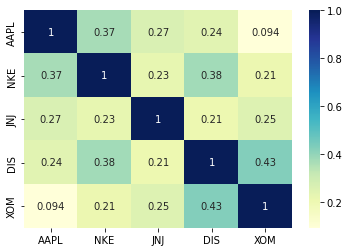

In [ ]:
import seaborn as sns
sns.heatmap(stocks.corr(), annot=True, cmap='YlGnBu')

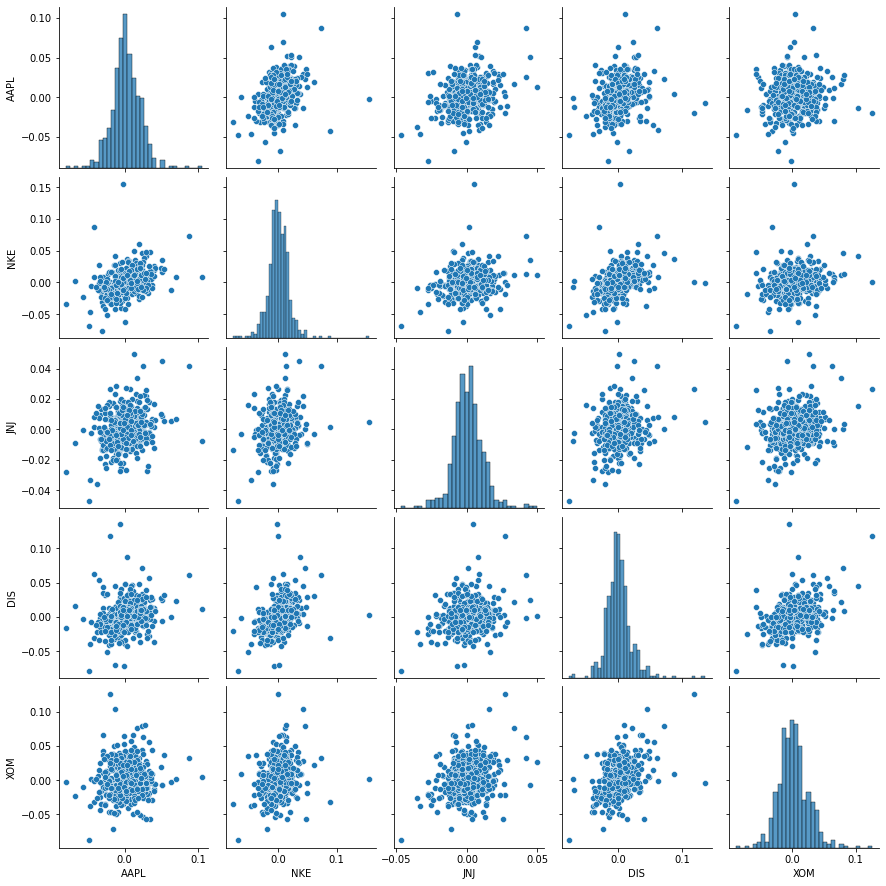

In [ ]:
sns.pairplot(stocks);

In [ ]:
#분산-공분산 행렬
covmat = stocks.cov()
covmat

,AAPL,NKE,JNJ,DIS,XOM
AAPL,0.000385,0.000137,0.000057,0.000097,0.000044
NKE,0.000137,0.000355,0.000046,0.000146,0.000095
JNJ,0.000057,0.000046,0.000117,0.000046,0.000066
DIS,0.000097,0.000146,0.000046,0.000415,0.000209
XOM,0.000044,0.000095,0.000066,0.000209,0.000574


문제 2: 애플, 나이키, 존슨앤존슨, 디즈니, 의슨모빌로 이루어진 주식 포트폴리오의 비중이 각각 10%, 20%, 20%, 25%, 25% 일때, Model-Building approach을 이용하여 포트폴리오의 99% 신뢰도 기준 1일 VaR을 구하시오

In [ ]:
weights = np.array([0.1, 0.2, 0.2, 0.25, 0.25])
portfolio = stocks @ weights
portfolio

Date
2020-04-02    0.035222
2020-04-03   -0.018430
2020-04-06    0.054903
2020-04-07    0.003392
2020-04-08    0.029079
                ...   
2022-03-21    0.008610
2022-03-22    0.007183
2022-03-23   -0.000533
2022-03-24    0.005066
2022-03-25    0.010525
Length: 500, dtype: float64

In [ ]:
#Covariance matrix로 포트폴리오의 standard deviation 구하기
portfolio_var = weights.T @ covmat @ weights
portfolio_std = np.sqrt(portfolio_var)
portfolio_std

0.012821301469411276

In [ ]:
alpha = 0.01
Z_value = stats.norm.ppf(abs(alpha))
round(Z_value,4)

-2.3263

In [ ]:
#99% 신뢰도 기준 1일 VaR(%)
parametric_VaR = Z_value * portfolio_std
round(parametric_VaR,4)

-0.0298

In [ ]:
#99% 신뢰도 기준 1일 ES(%)
parametric_ES = -portfolio_std * ((np.exp(-Z_value ** 2 / 2) / (np.sqrt(2 * np.pi) *alpha)))
round(parametric_ES, 4)

-0.0342

VaR estimated by MC

In [ ]:
corr = stocks.corr()
corr

,AAPL,NKE,JNJ,DIS,XOM
AAPL,1.000000,0.370427,0.269299,0.242692,0.093673
NKE,0.370427,1.000000,0.225291,0.380114,0.211484
JNJ,0.269299,0.225291,1.000000,0.209091,0.253929
DIS,0.242692,0.380114,0.209091,1.000000,0.427614
XOM,0.093673,0.211484,0.253929,0.427614,1.000000


In [ ]:
#상관관계가 있는 난수 구하기 (Cholensky decomposition)
L = np.linalg.cholesky(corr)
L

array([[1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.37042656, 0.92886176, 0.        , 0.        , 0.        ],
       [0.26929862, 0.13514987, 0.95352649, 0.        , 0.        ],
       [0.24269195, 0.31244084, 0.10645571, 0.91222175, 0.        ],
       [0.09367281, 0.19032426, 0.21287345, 0.35381032, 0.885723  ]])

In [ ]:
A = np.random.standard_normal((5,5000))
A = pd.DataFrame(A.T)
print(A.mean(), A.std())

0   -0.012460
1   -0.009533
2    0.015748
3   -0.016811
4   -0.012241
dtype: float64 0    1.006117
1    1.013651
2    0.999237
3    1.019438
4    0.989989
dtype: float64


In [ ]:
A = A - A.mean()
A.mean() #거의 0에 가까움

0    1.104894e-16
1   -1.423306e-17
2   -6.349365e-17
3   -7.509549e-17
4   -9.776624e-17
dtype: float64

In [ ]:
B = L @ A.T
B = pd.DataFrame(B.T)
B.columns = stocks.columns
B

,AAPL,NKE,JNJ,DIS,XOM
0,1.137930,-0.612042,0.259894,0.433289,0.375189
1,0.727014,1.474296,0.891065,0.453103,-0.609732
2,-0.356813,-0.277870,-0.434204,0.217058,-0.790063
3,-0.282555,-0.151133,0.025940,0.184448,-0.086233
4,-0.895724,-1.135275,-0.497691,-0.309970,-0.695485
...,...,...,...,...,...
4995,0.782689,1.779082,1.125606,0.967502,1.196608
4996,0.425497,1.168139,1.855168,2.114335,1.898401
4997,0.969190,2.311779,2.254373,1.860907,1.747734
4998,1.013597,0.392704,1.064602,-0.635180,-0.183734


In [ ]:
B.corr() #stocks의 correlation하고 비슷

,AAPL,NKE,JNJ,DIS,XOM
AAPL,1.000000,0.381655,0.244353,0.253887,0.093422
NKE,0.381655,1.000000,0.216506,0.377134,0.222365
JNJ,0.244353,0.216506,1.000000,0.172257,0.227755
DIS,0.253887,0.377134,0.172257,1.000000,0.436575
XOM,0.093422,0.222365,0.227755,0.436575,1.000000


In [ ]:
stocks.corr()

,AAPL,NKE,JNJ,DIS,XOM
AAPL,1.000000,0.370427,0.269299,0.242692,0.093673
NKE,0.370427,1.000000,0.225291,0.380114,0.211484
JNJ,0.269299,0.225291,1.000000,0.209091,0.253929
DIS,0.242692,0.380114,0.209091,1.000000,0.427614
XOM,0.093673,0.211484,0.253929,0.427614,1.000000


In [ ]:
sigmas = stocks.std()
sigmas

AAPL    0.019631
NKE     0.018835
JNJ     0.010817
DIS     0.020370
XOM     0.023950
dtype: float64

In [ ]:
returns = B * sigmas
returns

,AAPL,NKE,JNJ,DIS,XOM
0,0.022338,-0.011528,0.002811,0.008826,0.008986
1,0.014272,0.027769,0.009638,0.009230,-0.014603
2,-0.007004,-0.005234,-0.004697,0.004421,-0.018922
3,-0.005547,-0.002847,0.000281,0.003757,-0.002065
4,-0.017584,-0.021383,-0.005383,-0.006314,-0.016657
...,...,...,...,...,...
4995,0.015365,0.033509,0.012175,0.019708,0.028659
4996,0.008353,0.022002,0.020067,0.043069,0.045467
4997,0.019026,0.043543,0.024385,0.037906,0.041858
4998,0.019897,0.007397,0.011515,-0.012939,-0.004400


In [ ]:
stocks.std()

AAPL    0.019631
NKE     0.018835
JNJ     0.010817
DIS     0.020370
XOM     0.023950
dtype: float64

In [ ]:
returns.std()

AAPL    0.019751
NKE     0.019184
JNJ     0.010724
DIS     0.020674
XOM     0.023776
dtype: float64

In [ ]:
weights = [0.1, 0.2, 0.2, 0.25, 0.25]
portfolio = returns @ weights
portfolio

0       0.004943
1       0.007565
2      -0.006312
3      -0.000645
4      -0.012854
          ...   
4995    0.022765
4996    0.031383
4997    0.035429
4998    0.001437
4999    0.006351
Length: 5000, dtype: float64

In [ ]:
a = portfolio.sort_values()
a

397    -0.047079
3984   -0.041476
2442   -0.041423
2040   -0.038451
4227   -0.037413
          ...   
4595    0.038618
1121    0.039339
3702    0.039519
767     0.041569
1270    0.045039
Length: 5000, dtype: float64

In [ ]:
MC_VaR = a.iloc[49]
MC_VaR

-0.029786815737618363

In [ ]:
MC_ES = a.iloc[:49].mean()
MC_ES

-0.03308620537250109

In [ ]:
print('non-param VaR: ', round(historical_VaR, 4), '\nparam VaR: ', round(parametric_VaR,4), '\nMC VaR: ', MC_VaR)

non-param VaR:  -0.0311 
param VaR:  -0.0298 
MC VaR:  -0.029786815737618363


In [ ]:
print('non-param ES: ', round(historical_ES, 4), '\nparam ES: ', round(parametric_ES,4), '\nMC ES: ', MC_ES)

non-param ES:  -0.0413 
param ES:  -0.0342 
MC ES:  -0.03308620537250109


문제 3: 윌못책 80장을 참고하여 Box-Muler tranform을 이용해 상관관계가 있는 난수 5000개를 생성해 보세요

In [ ]:
import random
from math import log, cos, sin, sqrt, pi

def Box_Muller(mu=0, sigma=1):
  r = sqrt(-2 * log(random.random()))
  a = 2 * pi * random.random()
  return sigma * r * cos(a) + mu, sigma * r * sin(a) + mu


In [ ]:
def mullerplot(try_num = 5000):
  plt.title('Box-Muller-Method Histogram : mu = 0, sigma = 1')
  plt.xlabel('Value')
  plt.ylabel('RElative frequency')
  x = []
  for i in range(try_num):
    x += Box_Muller()
  print(x)
  plt.hist(x, density = True, bins=max(50, int(try_num/10)), rwidth=0.5, label = "try : "+str(try_num))
  plt.legend(loc = 'upper left') #범례 위치 지정
  #정규분포의 출력
  mu = 0
  variance = 1
  sigma = np.sqrt(variance)
  x = np.linspace (mu - 3 * sigma, mu + 3 * sigma, 100)
  plt.plot(x, stats.norm.pdf(x, mu, sigma)) #표준화 후 출력
  plt.figure(num=None,figsize=(10,6),dpi=300,facecolor='w',edgecolor='k')

[1.5497994289796089, 0.3097400255887738, -0.13467752698090665, 1.005236405694016, -2.0750359271581478, 2.61290222402666, -1.9387290790388396, 1.594961819121877, 0.31293556685214086, 0.6277447406750316, -0.8980057088740282, -0.07813715229195398, 1.9964311310406568, -0.13135226687874724, 0.025336586777717003, -0.1951290945607373, 0.4905260343637235, -0.9653403733637027, 0.5327573718129277, -0.2772364401994466, -0.43251457310613817, -1.1802336596485348, -0.23706966772108473, 0.8797032522483308, -2.3922991517052554, -1.5535252556196504, 0.8199824499546723, -0.31827434414085864, -0.6641352192338772, -0.1736980779213548, 0.9632893992718354, -1.016634425233682, 0.23424500917340335, -0.5631872534267018, 0.46373391729595065, -0.8985639725845626, -0.6500001118614639, -0.878930137710437, 1.6108955134227176, 0.7449773828342426, 3.0749258051879176, -0.29386684316505596, 0.09807445969214924, -0.9711675814629134, -0.8293989082447513, 0.05397081144410611, 1.804689028518476, -0.9258531492442871, -1.961

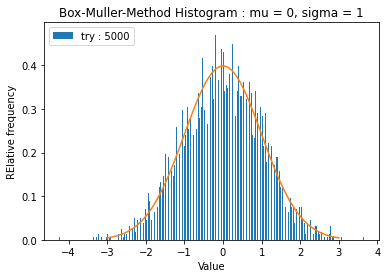

<Figure size 3000x1800 with 0 Axes>

In [ ]:
mullerplot(5000) # 5000회
plt.show()